# K-Means Clustering

In [1]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.2     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books a

## Data Preparation
To perform a cluster analysis in R, generally, the data should be prepared as follows:

Rows are observations (individuals) and columns are variables
Any missing value in the data must be removed or estimated.
The data must be standardized (i.e., scaled) to make variables comparable. Recall that, standardization consists of transforming the variables such that they have mean zero and standard deviation one.

In [2]:
df <- USArrests

To remove any missing value that might be present in the data, type this:

In [3]:
is.na(df)

,Murder,Assault,UrbanPop,Rape
Alabama,FALSE,FALSE,FALSE,FALSE
Alaska,FALSE,FALSE,FALSE,FALSE
Arizona,FALSE,FALSE,FALSE,FALSE
Arkansas,FALSE,FALSE,FALSE,FALSE
California,FALSE,FALSE,FALSE,FALSE
Colorado,FALSE,FALSE,FALSE,FALSE
Connecticut,FALSE,FALSE,FALSE,FALSE
Delaware,FALSE,FALSE,FALSE,FALSE
Florida,FALSE,FALSE,FALSE,FALSE
Georgia,FALSE,FALSE,FALSE,FALSE


In [4]:
df <- na.omit(df)

In [5]:
df <- scale(df)

In [6]:
head(df)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


get_dist: for computing a distance matrix between the rows of a data matrix. The default distance computed is the Euclidean

In [7]:
distance <- get_dist(df)


fviz_dist: for visualizing a distance matrix

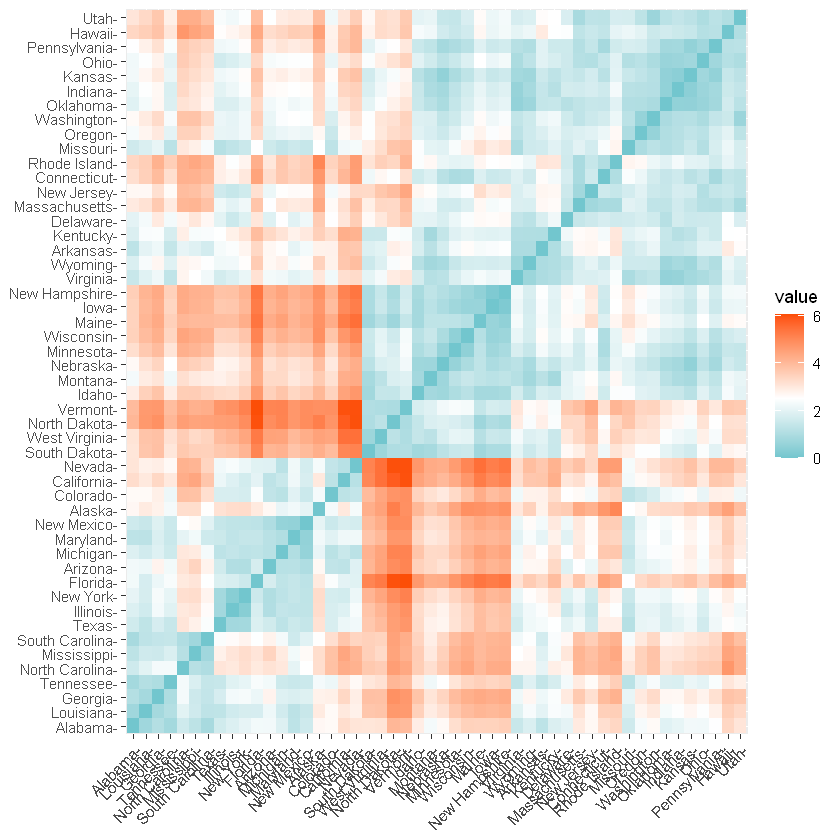

In [9]:
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

## K-Means Clustering
K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of k groups (i.e. k clusters), where k represents the number of groups pre-specified by the analyst. It classifies objects in multiple groups (i.e., clusters), such that objects within the same cluster are as similar as possible (i.e., high intra-class similarity), whereas objects from different clusters are as dissimilar as possible (i.e., low inter-class similarity). In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of points assigned to the cluster.

## K-means algorithm can be summarized as follows:

1. Specify the number of clusters (K) to be created (by the analyst)
2. Select randomly k objects from the data set as the initial cluster centers or means
3. Assigns each observation to their closest centroid, based on the Euclidean distance between the object and the centroid
4. For each of the k clusters update the cluster centroid by calculating the new mean values of all the data points in the cluster. The centroid of a Kth cluster is a vector of length p containing the means of all variables for the observations in the kth cluster; p is the number of variables.
5. Iteratively minimize the total within sum of square (Eq. 7). That is, iterate steps 3 and 4 until the cluster assignments stop changing or the maximum number of iterations is reached. By default, the R software uses 10 as the default value for the maximum number of iterations.

We can compute k-means in R with the kmeans function. Here will group the data into two clusters (centers = 2). The kmeans function also has an nstart option that attempts multiple initial configurations and reports on the best one. For example, adding nstart = 25 will generate 25 initial configurations. This approach is often recommended.

In [10]:
k2 <- kmeans(df,centers=2,nstart=25)

In [11]:
str(k2)

List of 9
 $ cluster     : Named int [1:50] 2 2 2 1 2 2 1 1 2 2 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:2, 1:4] -0.67 1.005 -0.676 1.014 -0.132 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:2] 56.1 46.7
 $ tot.withinss: num 103
 $ betweenss   : num 93.1
 $ size        : int [1:2] 30 20
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


The output of kmeans is a list with several bits of information. The most important being:

* cluster: A vector of integers (from 1:k) indicating the cluster to which each point is allocated.
* centers: A matrix of cluster centers.
* totss: The total sum of squares.
* withinss: Vector of within-cluster sum of squares, one component per cluster.
* tot.withinss: Total within-cluster sum of squares, i.e. sum(withinss).
* betweenss: The between-cluster sum of squares, i.e. $totss-tot.withinss$.
* size: The number of points in each cluster.

In [12]:
k2

K-means clustering with 2 clusters of sizes 30, 20

Cluster means:
     Murder    Assault   UrbanPop       Rape
1 -0.669956 -0.6758849 -0.1317235 -0.5646433
2  1.004934  1.0138274  0.1975853  0.8469650

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             2              2              2              1              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              1              1              2              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             1              1              2              1              1 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             1              1              2              1              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             1              2              1              2              2 
       Montana    

If we print the results we’ll see that our groupings resulted in 2 cluster sizes of 30 and 20. We see the cluster centers (means) for the two groups across the four variables (Murder, Assault, UrbanPop, Rape). We also get the cluster assignment for each observation (i.e. Alabama was assigned to cluster 2, Arkansas was assigned to cluster 1, etc.).

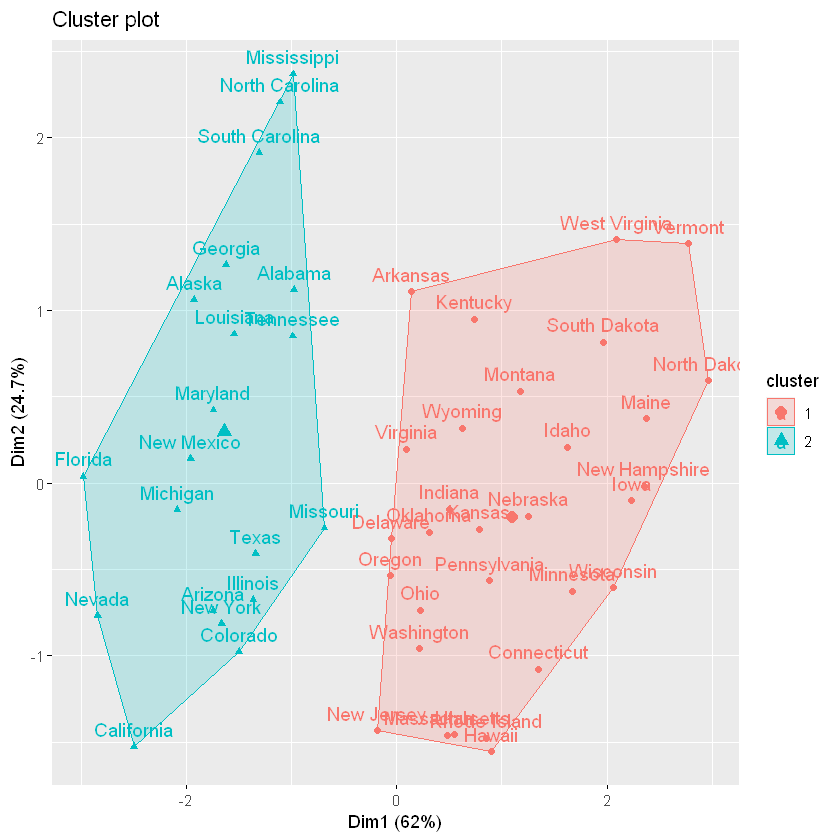

In [13]:
fviz_cluster(k2,data=df)

We can also view our results by using fviz_cluster. This provides a nice illustration of the clusters.

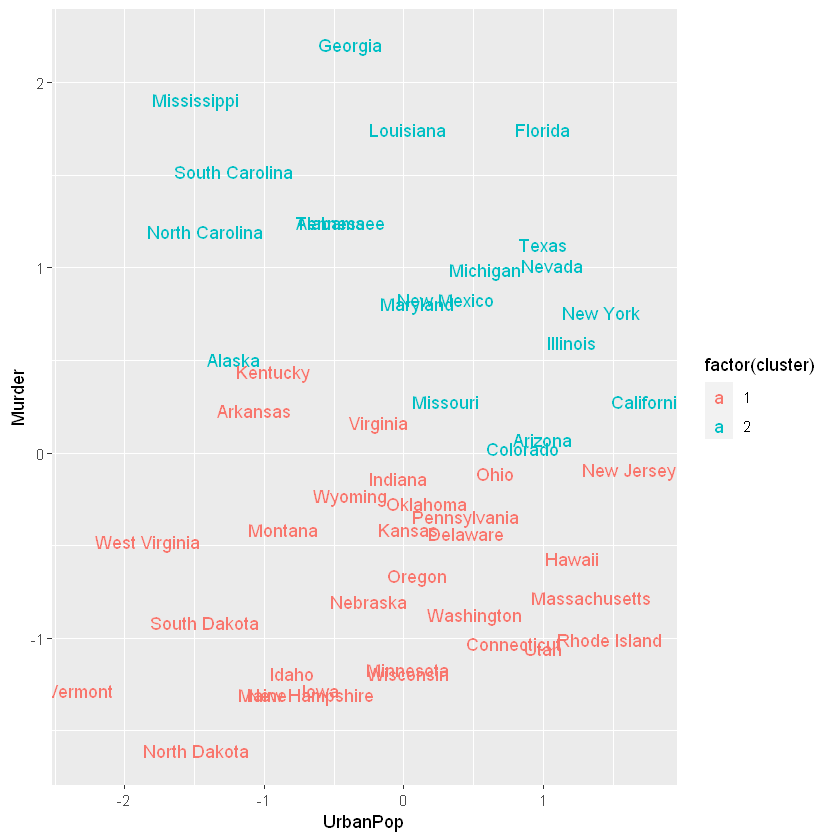

In [14]:
df %>%
as_tibble()%>%
mutate(cluster = k2$cluster,
      state = row.names(USArrests))%>%
ggplot(aes(UrbanPop,Murder,color=factor(cluster),label=state))+
geom_text()

In [15]:
k3 <- kmeans(df,centers=3,nstart = 25)
k4 <- kmeans(df,centers=4,nstart = 25)
k5 <- kmeans(df,centers=5,nstart = 25)



Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



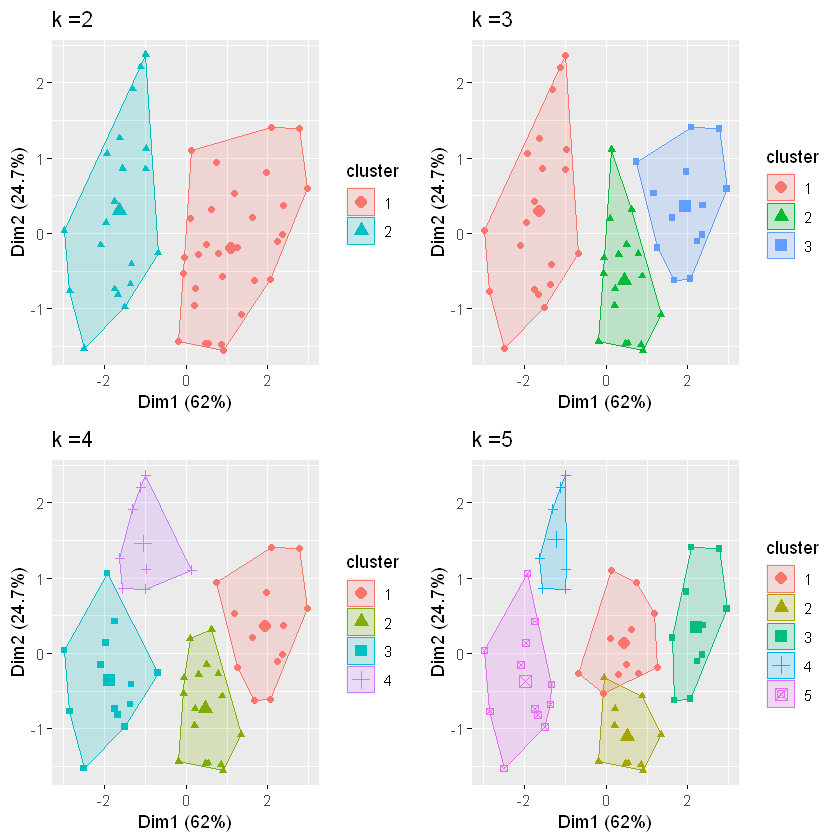

In [17]:
p1 <- fviz_cluster(k2,geom = "point",data = df) +ggtitle("k =2")
p2 <- fviz_cluster(k3,geom = "point",data = df) +ggtitle("k =3")
p3 <- fviz_cluster(k4,geom = "point",data = df) +ggtitle("k =4")
p4 <- fviz_cluster(k5,geom = "point",data = df) +ggtitle("k =5")

library(gridExtra)
grid.arrange(p1,p2,p3,p4)

## Determining Optimal Clusters
As you may recall the analyst specifies the number of clusters to use; preferably the analyst would like to use the optimal number of clusters. To aid the analyst, the following explains the three most popular methods for determining the optimal clusters, which includes:

1. Elbow method
2. Silhouette method
3. Gap statistic

### 1. Elbow Method

* Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters
* For each k, calculate the total within-cluster sum of square (wss)
* Plot the curve of wss according to the number of clusters k.
* The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

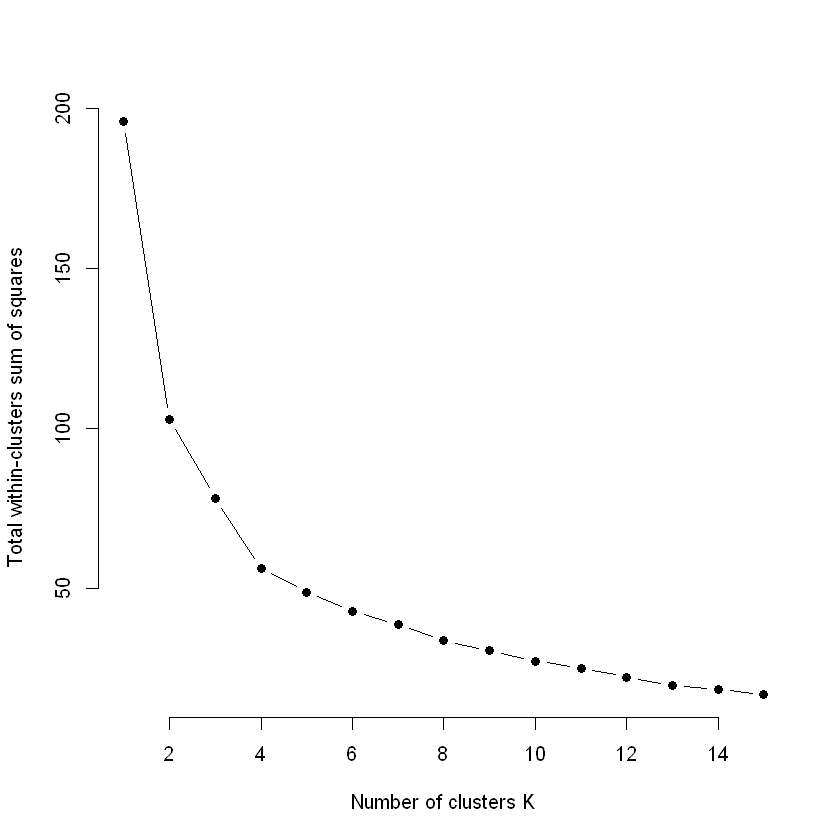

In [20]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

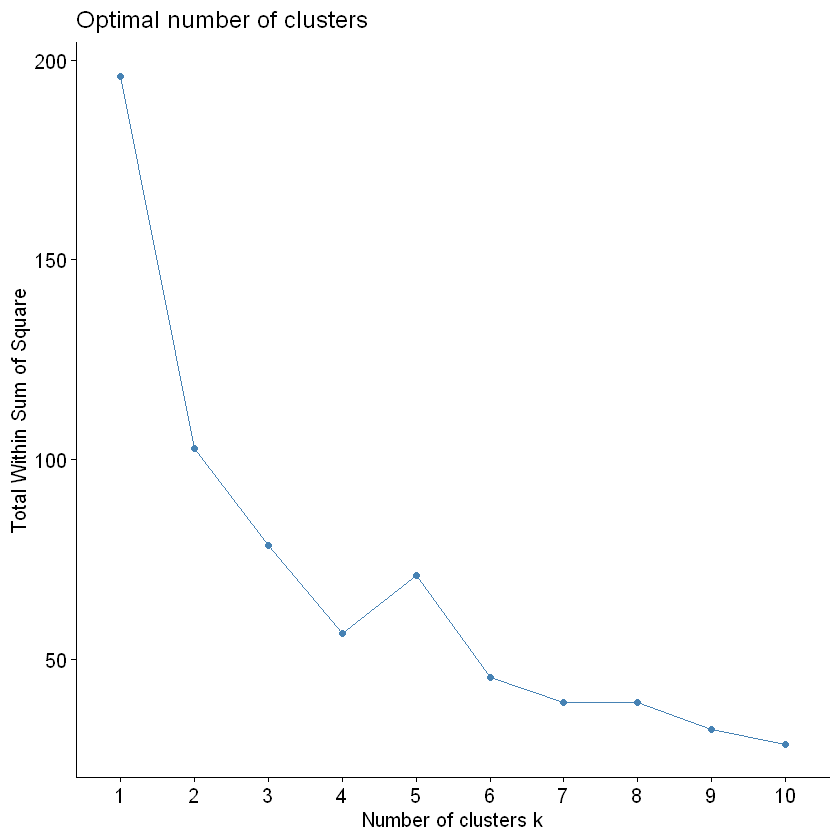

In [22]:
set.seed(123)
fviz_nbclust(df,kmeans,method="wss")

## 2. Average Silhouette Method
In short, the average silhouette approach measures the quality of a clustering. That is, it determines how well each object lies within its cluster. A high average silhouette width indicates a good clustering. The average silhouette method computes the average silhouette of observations for different values of k. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k.

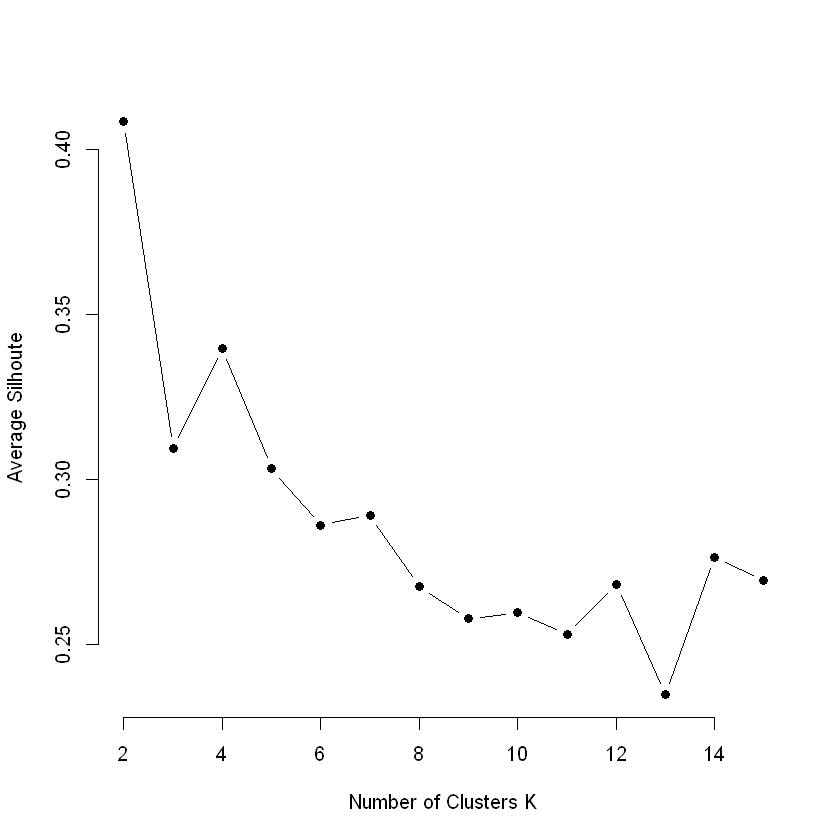

In [23]:
avg_sil <- function(k){
    km.res <- kmeans(df,centers=k, nstart=25)
    ss <- silhouette(km.res$cluster,dist(df))
    mean(ss[,3])

}
k.values <- 2:15

avg_sil_values <- map_dbl(k.values,avg_sil)

plot(k.values,avg_sil_values,
    type="b",pch = 19,frame=FALSE,
    xlab = "Number of Clusters K",
    ylab = "Average Silhoute")

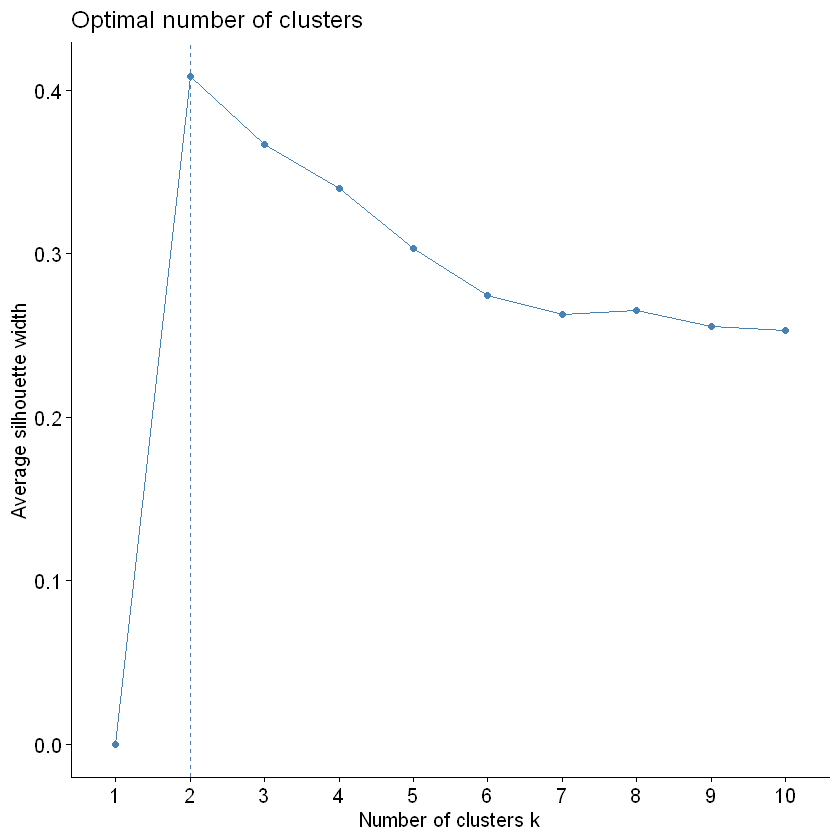

In [26]:
fviz_nbclust(df,kmeans,method = "silhouette")

## 3.Gap Statistic Method

The approach can be applied to any clustering method (i.e. K-means clustering, hierarchical clustering). The gap statistic compares the total intracluster variation for different values of k with their expected values under null reference distribution of the data 

In [27]:
set.seed(123)
gap_stat <- clusGap(df,FUN = kmeans, nstart=25,
                   K.max = 10,B = 50)
print(gap_stat,method = "firstmax")

Clustering Gap statistic ["clusGap"] from call:
clusGap(x = df, FUNcluster = kmeans, K.max = 10, B = 50, nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 4
          logW   E.logW       gap     SE.sim
 [1,] 3.458369 3.640154 0.1817845 0.04422857
 [2,] 3.135112 3.372283 0.2371717 0.03559601
 [3,] 2.977727 3.233771 0.2560446 0.03749193
 [4,] 2.826221 3.119172 0.2929511 0.04067348
 [5,] 2.738868 3.019965 0.2810969 0.04185469
 [6,] 2.666967 2.930002 0.2630347 0.04105040
 [7,] 2.609895 2.852152 0.2422572 0.04184725
 [8,] 2.539156 2.778562 0.2394054 0.04292750
 [9,] 2.468162 2.711752 0.2435901 0.04344197
[10,] 2.407265 2.647595 0.2403307 0.04548446


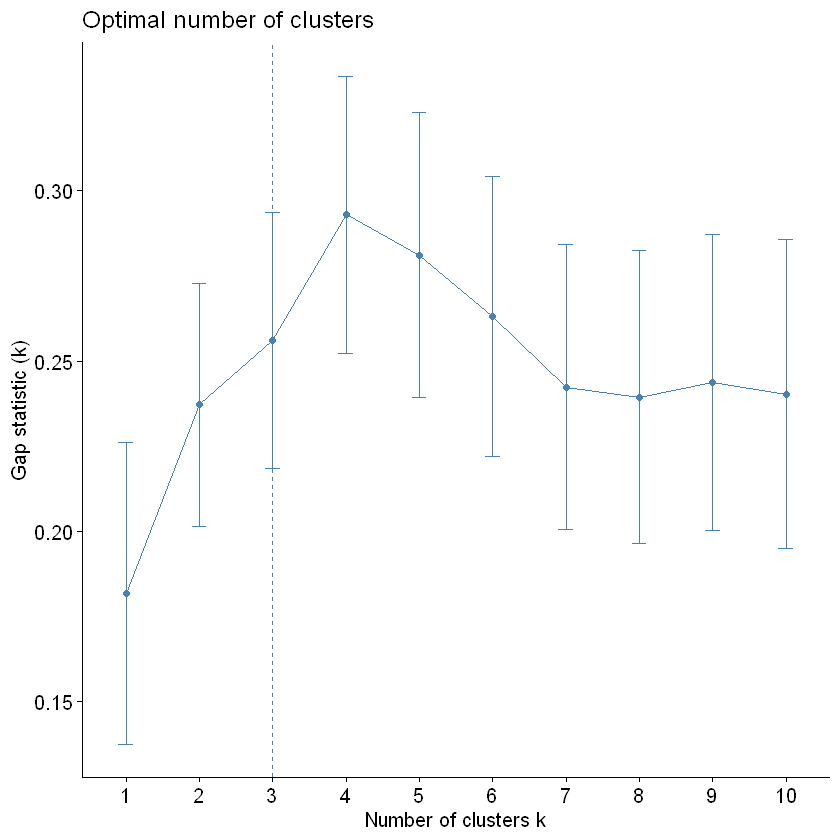

In [28]:
fviz_gap_stat(gap_stat)

In [29]:
set.seed(123)
final <- kmeans(df,4,nstart=25)
print(final)

K-means clustering with 4 clusters of sizes 8, 13, 16, 13

Cluster means:
      Murder    Assault   UrbanPop        Rape
1  1.4118898  0.8743346 -0.8145211  0.01927104
2 -0.9615407 -1.1066010 -0.9301069 -0.96676331
3 -0.4894375 -0.3826001  0.5758298 -0.26165379
4  0.6950701  1.0394414  0.7226370  1.27693964

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              4              4              1              4 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             4              3              3              4              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              2              4              3              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              2              1              2              4 
 Massachusetts       Michigan      Minnesota    Mississippi    

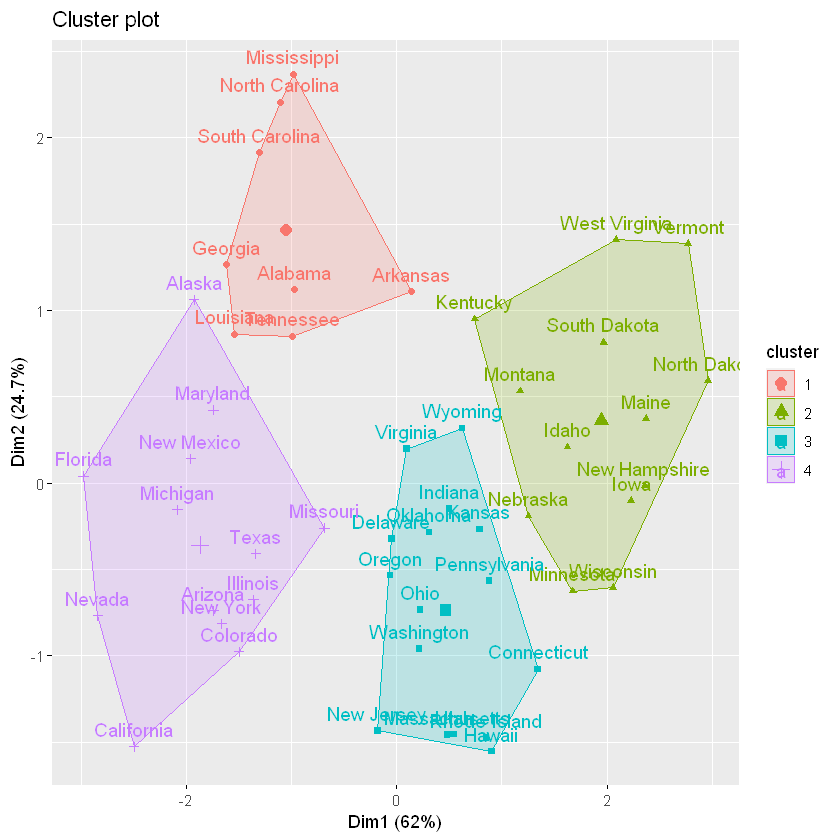

In [30]:
fviz_cluster(final,data = df)

In [32]:
USArrests %>%
  mutate(Cluster = final$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

Cluster,Murder,Assault,UrbanPop,Rape
1,13.93750,243.62500,53.75000,21.41250
2,3.60000,78.53846,52.07692,12.17692
3,5.65625,138.87500,73.87500,18.78125
4,10.81538,257.38462,76.00000,33.19231
